In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False

In [4]:
data = pd.read_csv('/Users/yangzhou/R语言/统计分析/上证50.csv',index_col=0)

In [5]:
data

,日期,上证50,用友网络,紫金矿业,中国平安,中国建筑,海通证券,中国中免,新华保险,中国石化,...,中国神华,山东黄金,闻泰科技,招商银行,药明康德,海螺水泥,中国石油,韦尔股份,农业银行,复星医药
1,2021/09/02,3167.10,32.58,10.90,51.55,5.19,13.35,228.05,42.45,4.31,...,20.11,18.22,113.20,51.60,128.52,43.34,4.96,241.50,2.98,62.19
2,2021/09/03,3175.88,32.72,11.07,51.71,5.07,13.21,236.40,42.74,4.36,...,19.97,18.36,112.10,52.00,133.70,43.69,5.05,232.50,3.01,62.60
3,2021/09/06,3211.20,33.38,10.95,51.58,5.15,13.51,243.00,43.01,4.36,...,20.77,18.50,112.49,51.20,140.64,45.70,5.01,240.84,3.01,64.64
4,2021/09/07,3248.05,33.72,10.98,52.34,5.20,13.81,249.56,43.05,4.48,...,21.28,18.40,113.08,52.81,141.20,45.27,5.13,245.52,3.02,63.80
5,2021/09/08,3213.26,33.14,10.85,51.95,5.23,13.67,249.33,42.90,4.53,...,21.81,18.96,106.95,52.41,139.91,44.57,5.16,243.08,3.04,64.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2022/02/21,3144.87,33.18,11.12,54.16,5.46,11.70,215.55,39.97,4.36,...,26.41,19.85,109.42,51.76,98.20,43.16,5.57,236.95,3.03,42.92
111,2022/02/22,3102.32,32.08,11.20,53.07,5.39,11.54,210.80,39.48,4.40,...,26.60,20.46,108.00,51.22,96.80,42.49,5.80,238.00,3.01,41.75
112,2022/02/23,3118.04,32.73,10.92,52.89,5.30,11.59,210.89,39.30,4.33,...,25.51,19.94,115.64,50.83,99.66,41.86,5.67,248.29,3.01,42.20
113,2022/02/24,3059.64,31.07,11.00,51.46,5.15,11.26,203.99,38.35,4.39,...,25.50,21.41,115.40,50.02,98.70,40.58,5.91,245.95,2.97,41.11


In [6]:
data.isnull().sum()

日期       0
上证50     0
用友网络     0
紫金矿业     0
中国平安     0
中国建筑     0
海通证券     0
中国中免     0
新华保险     0
中国石化     0
浦发银行     0
恒生电子     0
通威股份     0
山西汾酒     0
上汽集团     0
航发动力     0
伊利股份     0
长城汽车     0
保利发展     0
恒瑞医药     0
隆基股份     0
兴业银行     0
中国人寿     0
中国太保     0
国泰君安     0
工商银行     0
中国联通     0
长江电力    10
贵州茅台     0
兆易创新     0
海尔智家     0
中金公司     0
万华化学     0
华泰证券     0
三一重工     0
中信证券     6
海天味业     0
工业富联     0
中远海控     0
中信建投     0
中国电信     0
片仔癀      0
中国神华     0
山东黄金     0
闻泰科技     0
招商银行     0
药明康德     0
海螺水泥     0
中国石油     0
韦尔股份     0
农业银行     0
复星医药     0
dtype: int64

In [7]:
data.dropna(axis=1,inplace=True)

In [8]:
data

,日期,上证50,用友网络,紫金矿业,中国平安,中国建筑,海通证券,中国中免,新华保险,中国石化,...,中国神华,山东黄金,闻泰科技,招商银行,药明康德,海螺水泥,中国石油,韦尔股份,农业银行,复星医药
1,2021/09/02,3167.10,32.58,10.90,51.55,5.19,13.35,228.05,42.45,4.31,...,20.11,18.22,113.20,51.60,128.52,43.34,4.96,241.50,2.98,62.19
2,2021/09/03,3175.88,32.72,11.07,51.71,5.07,13.21,236.40,42.74,4.36,...,19.97,18.36,112.10,52.00,133.70,43.69,5.05,232.50,3.01,62.60
3,2021/09/06,3211.20,33.38,10.95,51.58,5.15,13.51,243.00,43.01,4.36,...,20.77,18.50,112.49,51.20,140.64,45.70,5.01,240.84,3.01,64.64
4,2021/09/07,3248.05,33.72,10.98,52.34,5.20,13.81,249.56,43.05,4.48,...,21.28,18.40,113.08,52.81,141.20,45.27,5.13,245.52,3.02,63.80
5,2021/09/08,3213.26,33.14,10.85,51.95,5.23,13.67,249.33,42.90,4.53,...,21.81,18.96,106.95,52.41,139.91,44.57,5.16,243.08,3.04,64.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2022/02/21,3144.87,33.18,11.12,54.16,5.46,11.70,215.55,39.97,4.36,...,26.41,19.85,109.42,51.76,98.20,43.16,5.57,236.95,3.03,42.92
111,2022/02/22,3102.32,32.08,11.20,53.07,5.39,11.54,210.80,39.48,4.40,...,26.60,20.46,108.00,51.22,96.80,42.49,5.80,238.00,3.01,41.75
112,2022/02/23,3118.04,32.73,10.92,52.89,5.30,11.59,210.89,39.30,4.33,...,25.51,19.94,115.64,50.83,99.66,41.86,5.67,248.29,3.01,42.20
113,2022/02/24,3059.64,31.07,11.00,51.46,5.15,11.26,203.99,38.35,4.39,...,25.50,21.41,115.40,50.02,98.70,40.58,5.91,245.95,2.97,41.11


In [9]:
X = data.iloc[:,2:]
Y = data.iloc[:,1]
# train_num = int(np.floor(data.shape[0]*0.7))
# test_num = int(data.shape[0]-train_num)
# Xtrain = X[:train_num]
# Xtest = X[-test_num:]
# Ytrain = Y[:train_num]
# Ytest = Y[-test_num:]

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=123)

In [11]:
lr = LR().fit(Xtrain,Ytrain)
coef = lr.coef_
MSE(Ytest,lr.predict(Xtest))

7.0239766630836185

In [12]:
Ypredict = lr.predict(Xtest)

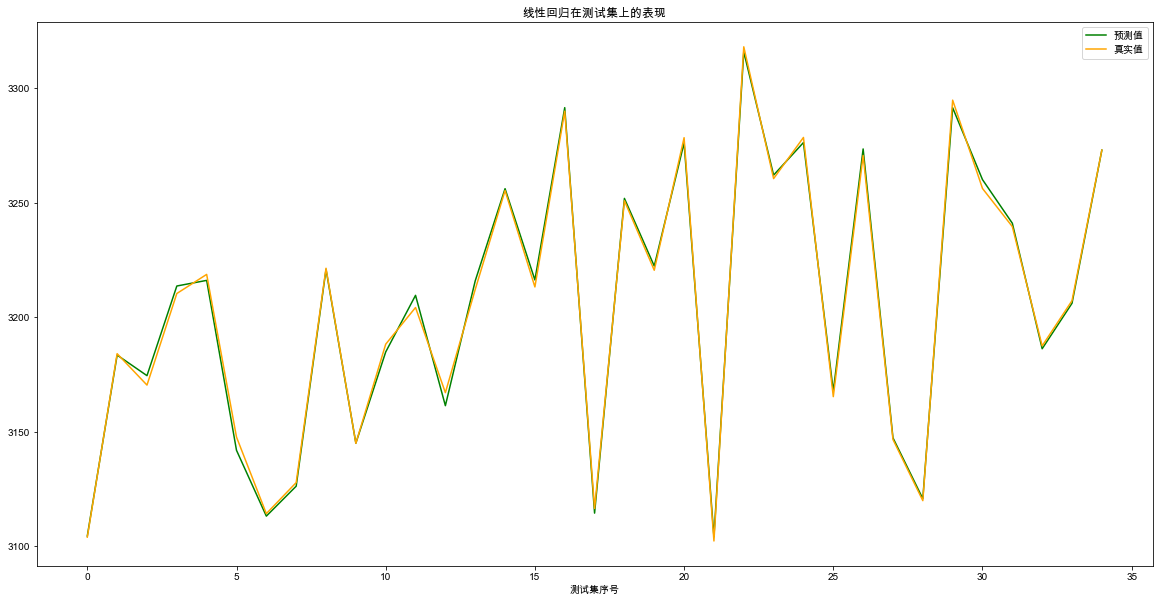

In [56]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.plot(range(len(Xtest)),Ypredict,color = 'green',label='预测值')
ax.plot(range(len(Xtest)),Ytest,color = 'orange',label='真实值')
ax.set_title('线性回归在测试集上的表现')
ax.set_xlabel('测试集序号')
ax.legend()

In [55]:
MSE(Ytrain,lr.predict(Xtrain))

0.9967285220891731

In [13]:
Ypredict

array([3104.49466098, 3183.51294493, 3174.52178342, 3213.66703332,
       3216.12449084, 3141.91959591, 3113.17844122, 3126.24970931,
       3220.95506955, 3145.03948037, 3184.85896698, 3209.59235049,
       3161.40597236, 3215.91018063, 3256.17387967, 3216.32266899,
       3291.56031733, 3114.4845103 , 3251.92877546, 3222.38445499,
       3276.19999144, 3104.13850204, 3315.93938849, 3262.0964082 ,
       3276.30948786, 3167.71092755, 3273.51958396, 3147.3663506 ,
       3120.80150346, 3291.51532575, 3260.12388551, 3241.07811126,
       3186.27513425, 3206.12040077, 3272.99847829])

In [14]:
def bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest,example_num=200):
    dataset_index = np.random.choice(Xtrain.index,size=example_num,replace=True)
    dataset = Xtrain.loc[dataset_index,:]
    label = pd.Series(Ytrain).loc[dataset_index]
    lr = LR().fit(dataset,label)
    coef = lr.coef_
    predict = lr.predict(Xtest)
    return predict

In [15]:
bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest)

array([3105.6569734 , 3182.63100115, 3175.46150124, 3213.66923931,
       3217.54732894, 3144.65540673, 3111.70717987, 3125.30956159,
       3221.85658636, 3145.60303275, 3186.2256694 , 3208.95601203,
       3161.69848198, 3214.95025083, 3255.7236565 , 3216.97496071,
       3292.68004995, 3113.29590065, 3250.65568054, 3222.80505942,
       3276.92136671, 3103.46025084, 3316.38358948, 3261.84430209,
       3275.55863361, 3167.23716993, 3272.98938529, 3147.07378094,
       3121.12850489, 3291.3279708 , 3258.62552495, 3240.43190083,
       3187.36801464, 3206.3145854 , 3271.65230872])

In [16]:
def bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,iteration = 1000,**kargs):
    Ybootstrappredict = np.array([bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest,**kargs) for i in range(iteration)]).mean(axis=0)
    bootstraplinearmodelmse = MSE(Ytest,Ybootstrappredict)
    trainmse = MSE(Ytrain,)
    return Ybootstrappredict,bootstraplinearmodelmse

In [17]:
Ybootstrappredict,bootstraplinearmodelmse = bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,example_num=1000)

In [18]:
bootstraplinearmodelmse

6.997789025135716

In [19]:
mse1 = []
Ybootstrappredicts1 = []
for i in range(100,1500,100):
    Ybootstrappredict,bootstraplinearmodelmse = bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,example_num=i)
    mse1.append(bootstraplinearmodelmse)
    Ybootstrappredicts1.append(Ybootstrappredict)

Text(0, 0.5, 'MSE')

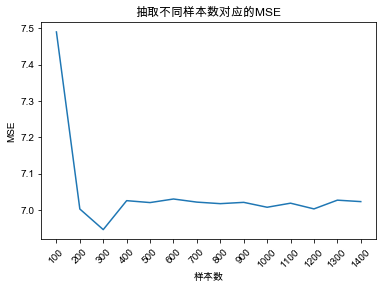

In [20]:
plt.plot(range(14),mse1)
plt.title('抽取不同样本数对应的MSE')
plt.xticks(range(14),[*range(100,1500,100)],rotation=45)
plt.xlabel('样本数')
plt.ylabel('MSE')

In [21]:
min(mse1),[*range(100,1500,100)][mse1.index(min(mse1))],Ybootstrappredicts1[mse1.index(min(mse1))]

(6.945581992252458,
 300,
 array([3104.53820706, 3183.43527806, 3174.51997433, 3213.72615286,
        3216.16564394, 3141.8500248 , 3113.11221229, 3126.30942385,
        3220.98560746, 3145.08437263, 3184.88351118, 3209.37268855,
        3161.37874148, 3215.83106125, 3256.2290256 , 3216.35346906,
        3291.54182712, 3114.51013741, 3251.94519621, 3222.30273074,
        3276.35852766, 3104.09498242, 3315.8653028 , 3262.08720891,
        3276.33088706, 3167.74126391, 3273.4076417 , 3147.26719591,
        3120.82094674, 3291.42643056, 3260.02058573, 3241.06644297,
        3186.06674717, 3206.14908259, 3273.04100254]))

In [22]:
mse2 = []
Ybootstrappredicts2 = []
for i in range(80,300,20):
    Ybootstrappredict,bootstraplinearmodelmse = bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,example_num=i)
    mse2.append(bootstraplinearmodelmse)
    Ybootstrappredicts2.append(Ybootstrappredict)

Text(0, 0.5, 'MSE')

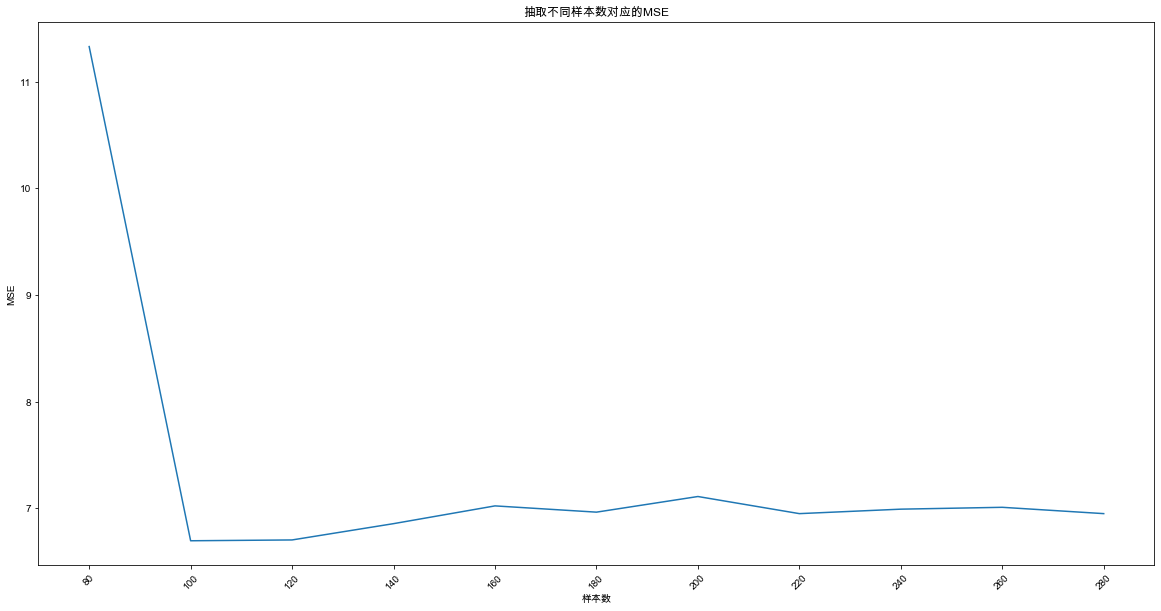

In [57]:
plt.figure(figsize=(20,10))
plt.plot(range(11),mse2)
plt.title('抽取不同样本数对应的MSE')
plt.xticks(range(11),[*range(80,300,20)],rotation=45)
plt.xlabel('样本数')
plt.ylabel('MSE')

In [24]:
min(mse2),[*range(80,300,20)][mse2.index(min(mse2))],Ybootstrappredicts2[mse2.index(min(mse2))]

(6.69593427618146,
 100,
 array([3105.1298032 , 3183.29978778, 3174.83475786, 3214.15474939,
        3216.60175643, 3141.84386367, 3112.32946182, 3126.83280357,
        3221.43379941, 3145.10950032, 3185.01074568, 3207.7446538 ,
        3160.98854168, 3215.55231516, 3256.68839255, 3217.21660602,
        3291.36263142, 3114.67954728, 3251.94533989, 3221.62901229,
        3277.23742058, 3104.02036428, 3315.16450159, 3261.8176588 ,
        3276.59929016, 3167.40048032, 3272.90880305, 3146.61258342,
        3121.22269537, 3291.4048493 , 3259.53999162, 3241.00585847,
        3185.416866  , 3206.45327065, 3273.14260822]))

In [25]:
len(np.array(mse1)[np.array(mse1)<MSE(Ytest,lr.predict(Xtest))])

10

In [26]:
# def bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,iteration = 1000,**kargs):
#     coef = [bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest,**kargs) for i in range(iteration)]
# #     score = [bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest,**kargs)[1] for i in range(iteration)]
#     bootstraplinearmodelcoef = np.array(coef).mean(axis=0)
# #     bootstraplinearmodelmse = np.array(score).mean()
#     Ybootstrappredict = [] 
#     for i in range(len(Xtest)):
#         Ybootstrappredict.append(np.dot(Xtest.iloc[i],bootstraplinearmodelcoef))
    
# #     bootstraplinearmodelmse = MSE(Ytest,Ybootstrappredict)
#     return bootstraplinearmodelcoef #,bootstraplinearmodelmse,Ybootstrappredict

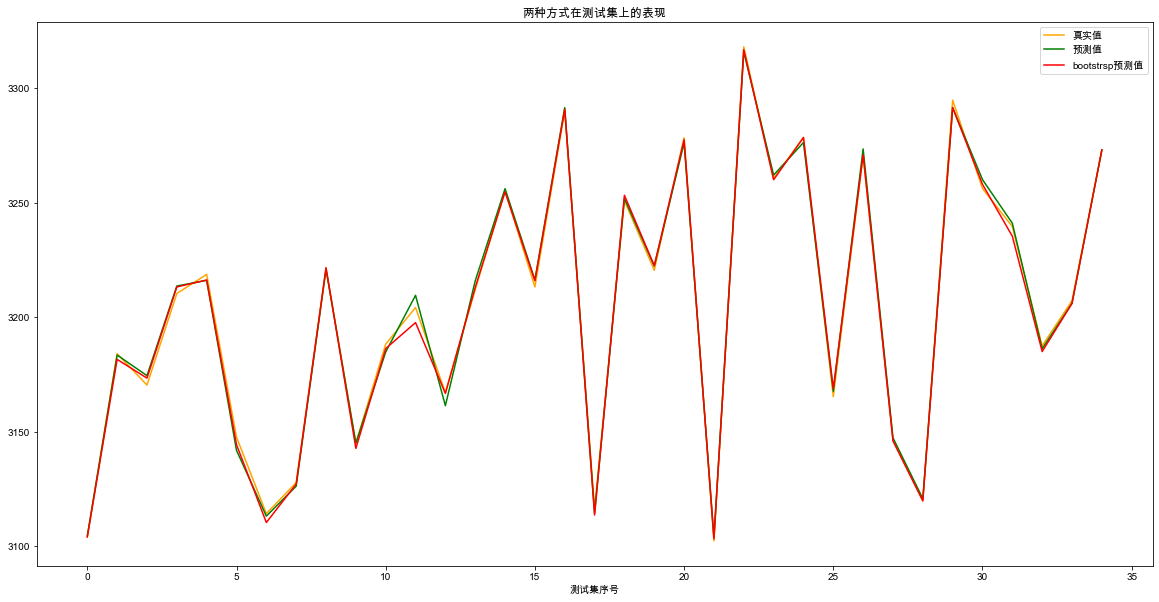

In [68]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(0,len(Xtest),1), Ytest, color='orange',label='真实值')
ax.plot(range(0,len(Xtest),1), Ypredict, color='green',label='预测值')
ax.plot(range(0,len(Xtest),1), Ybootstrappredicts[mses.index(min(mses))], color='red',label='bootstrsp预测值')
ax.set_title('两种方式在测试集上的表现')
ax.set_xlabel('测试集序号')
ax.legend()

In [30]:
mse3 = []
Ybootstrappredicts3 = []
for i in range(100,1500,100):
    Ybootstrappredict,bootstraplinearmodelmse = bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,example_num=100,iteration=i)
    mse3.append(bootstraplinearmodelmse)
    Ybootstrappredicts3.append(Ybootstrappredict)

Text(0, 0.5, 'MSE')

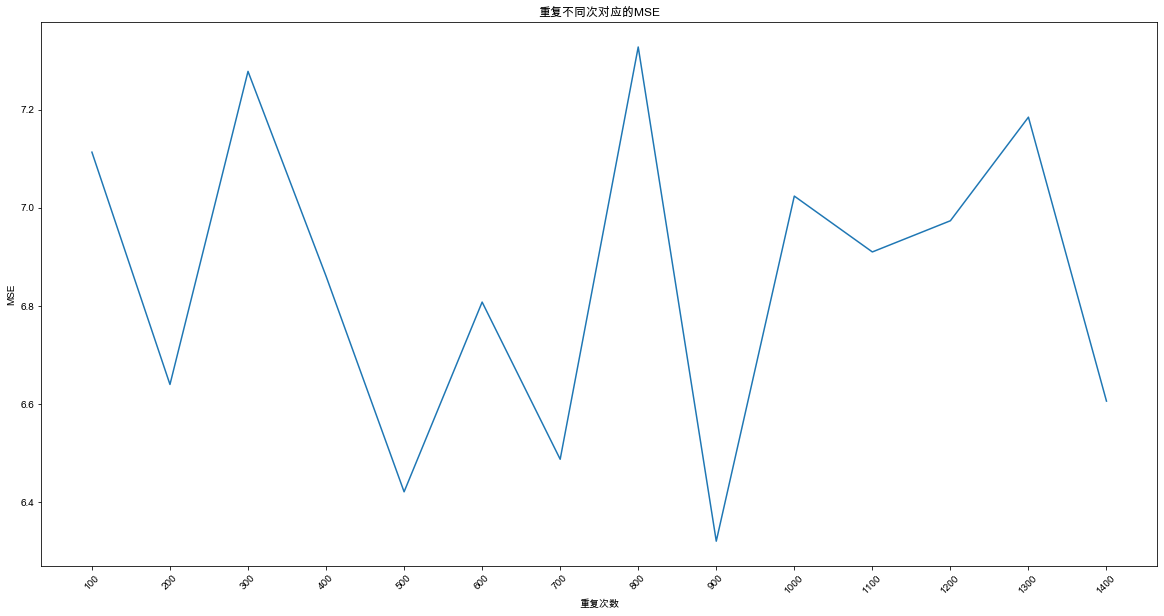

In [58]:
plt.figure(figsize=(20,10))
plt.plot(range(14),mse3)
plt.title('重复不同次对应的MSE')
plt.xticks(range(14),[*range(100,1500,100)],rotation=45)
plt.xlabel('重复次数')
plt.ylabel('MSE')

In [32]:
min(mse3),[*range(100,1500,100)][mse3.index(min(mse3))],Ybootstrappredicts3[mse3.index(min(mse3))]

(6.3207020546467945,
 900,
 array([3105.19874034, 3183.24381699, 3174.77555512, 3214.09265269,
        3216.43634266, 3142.08134937, 3112.43830967, 3126.76071233,
        3221.31737315, 3145.20459059, 3184.50513102, 3206.98080502,
        3161.68112268, 3215.37608816, 3256.703729  , 3217.13022884,
        3291.33394486, 3114.89468548, 3252.1711198 , 3221.6841194 ,
        3277.39664841, 3103.94705081, 3315.1718168 , 3261.68365236,
        3276.93725992, 3167.6386783 , 3272.68576564, 3146.34783852,
        3121.1235306 , 3290.91170424, 3259.47334256, 3240.87490615,
        3185.36125694, 3206.40890878, 3273.19325197]))

In [34]:
a = [*range(80,300,20)]
b = [*range(100,1500,100)]

In [38]:
parameters = []
for i in a:
    for j in b:
        parameters.append((i,j))

In [41]:
mses = []
Ybootstrappredicts = []
for _ in parameters:
    Ybootstrappredict,bootstraplinearmodelmse = bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,example_num=_[0],iteration=_[1])
    mses.append(bootstraplinearmodelmse)
    Ybootstrappredicts.append(Ybootstrappredict)

Text(0, 0.5, 'MSE')

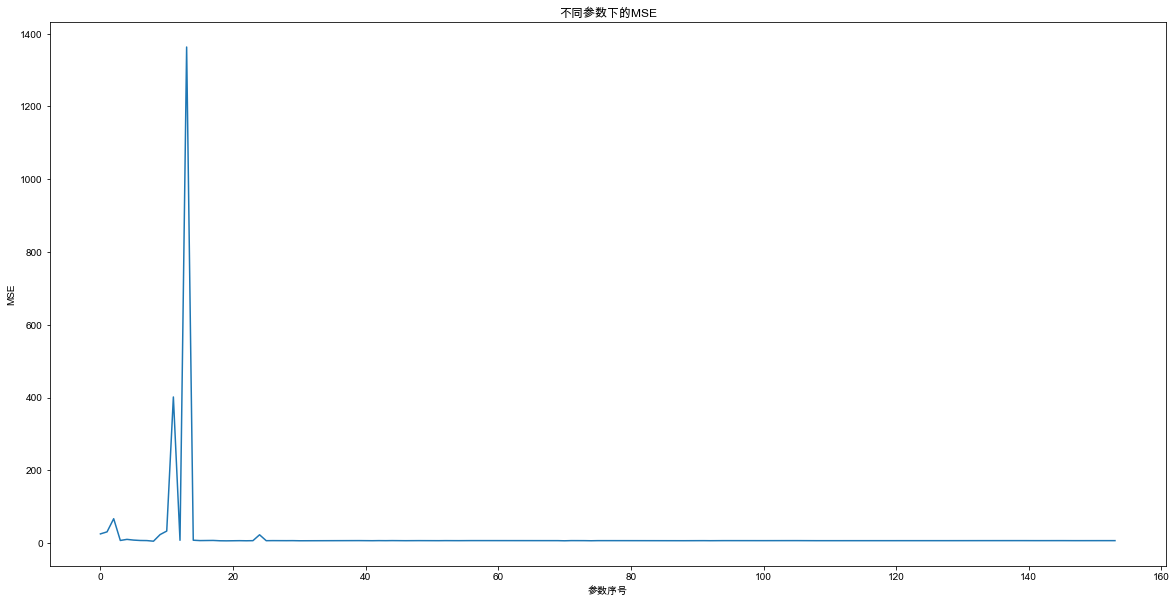

In [49]:
plt.figure(figsize=(20,10))
plt.plot(range(len(parameters)),mses)
plt.title('不同参数下的MSE')
# plt.xticks(range(len(parameters)),parameters,rotation=45)
plt.xlabel('参数序号')
plt.ylabel('MSE')

In [44]:
min(mses),parameters[mses.index(min(mses))],Ybootstrappredicts[mses.index(min(mses))]

(5.444044673686153,
 (80, 900),
 array([3104.12784115, 3181.62046306, 3173.44217409, 3213.24855151,
        3216.30254113, 3144.38446687, 3110.37481634, 3127.18693639,
        3221.66743523, 3142.73802809, 3186.3408867 , 3197.68281231,
        3166.75714779, 3213.00283502, 3254.73992838, 3215.94498448,
        3290.87620107, 3113.66563283, 3253.289907  , 3222.55301025,
        3277.58630981, 3103.23991286, 3316.86970565, 3260.09279183,
        3278.51284382, 3168.92274083, 3270.94564292, 3145.97012287,
        3119.81824274, 3291.61459992, 3258.06550134, 3235.40150673,
        3185.04644489, 3206.07144437, 3273.14666877]))

In [65]:
np.array(mses)[np.array(mses)<MSE(Ytest,lr.predict(Xtest))].size

111

In [247]:
X = data.iloc[:,2:]
Y = data.iloc[:,1]
train_num = int(np.floor(data.shape[0]*0.7))
test_num = int(data.shape[0]-train_num)
Xtrain = X[:train_num]
Xtest = X[-test_num:]
Ytrain = Y[:train_num]
Ytest = Y[-test_num:]

In [248]:
lr = LR().fit(Xtrain,Ytrain)
coef = lr.coef_
MSE(Ytest,lr.predict(Xtest))

325.03205517105647

In [249]:
Ypredict = lr.predict(Xtest)

In [250]:
def bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest,example_num=200):
    dataset_index = np.random.choice(Xtrain.index,size=example_num,replace=True)
    dataset = Xtrain.loc[dataset_index,:]
    label = pd.Series(Ytrain).loc[dataset_index]
    lr = LR().fit(dataset,label)
    coef = lr.coef_
    predict = lr.predict(Xtest)
    return predict

In [251]:
def bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,iteration = 1000,**kargs):
    Ybootstrappredict = np.array([bootstraplinearmodel(Xtrain,Ytrain,Xtest,Ytest,**kargs) for i in range(iteration)]).mean(axis=0)
    bootstraplinearmodelmse = MSE(Ytest,Ybootstrappredict)
    return Ybootstrappredict,bootstraplinearmodelmse

In [256]:
Ybootstrappredict,bootstraplinearmodelmse = bootstraplinearpredict(Xtrain,Ytrain,Xtest,Ytest,example_num=1000)

In [257]:
bootstraplinearmodelmse

327.5837579208422